# 1. Import the dataset and explore the data

## **1.1 Importing libraries**

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import warnings
import zipfile, io

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Statistical libraries
import scipy.stats as ss
from scipy import stats
from scipy.stats import f_oneway
from scipy.sparse import csr_matrix

# Scikit-learn preprocessing and model selection
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Scikit-learn feature selection
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_classif, RFE, RFECV

# Scikit-learn models
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Scikit-learn metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report

# Seaborn settings
sns.set()

# Ignore warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

## **1.2 Importing the datasets**

In [2]:
# extract the project data zip file
z = zipfile.ZipFile('project_data.zip')
z.extractall()

del z

In [3]:
# load the data (train and test)
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

## **1.3 Basic Information about the Datasets**

In [4]:
# display the first 3 rows of the training DataFrame to inspect its structure and values
df_train.head(3) 

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   

     C-3 Date                  Carrier Name  ... WCIO Cause of Injury Code  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  ...                      97.0   
2         NaN     INDEMNITY INSURANCE CO OF  ...                      79.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0      FROM LIQUID OR GREASE SPILLS                       10.0   
1                 REPETITIVE MOTION                       49.0   
2    OBJECT BEING LIFTED OR HANDLED                        7.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   62.0   
1                    SPRAIN OR TEAR                   38.0   
2                        CONCUSSION                   10.0   

  WCIO Part Of Body Description Zip Code Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662               0.0  Not Work Related   
1                   SHOULDER(S)    14569               1.0  Not Work Related   
2          MULTIPLE HEAD INJURY    12589               0.0  Not Work Related   

   Number of Dependents  
0                   1.0  
1                   4.0  
2                   6.0  

[3 rows x 33 columns]

In [5]:
# display a concise summary of the training DataFrame, including column names, non-null counts, and data types
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

`INPUT VARIABLES`: numerical and categorical <br>
`OUTPUT VARIABLE`: categorical <br>

__GOAL__: Predict Claim Injury Type

**Multiclass Classification Problem**

## **1.4 Descriptive Statistics**

In [6]:
# Count the number of duplicates
num_duplicates = df_train.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 0


In [7]:
# Generate descriptive statistics for all columns in the DataFrame, including non-numeric columns
# Transpose the result for better readability
df_train.describe(include='all').T

count unique  \
Accident Date                         570337   5539   
Age at Injury                       574026.0    NaN   
Alternative Dispute Resolution        574026      3   
Assembly Date                         593471   1096   
Attorney/Representative               574026      2   
Average Weekly Wage                 545375.0    NaN   
Birth Year                          544948.0    NaN   
C-2 Date                              559466   2475   
C-3 Date                              187245   1648   
Carrier Name                          574026   2046   
Carrier Type                          574026      8   
Claim Identifier                    593471.0    NaN   
Claim Injury Type                     574026      8   
County of Injury                      574026     63   
COVID-19 Indicator                    574026      2   
District Name                         574026      8   
First Hearing Date                    150798   1094   
Gender                                574026      4   
IME-4 Count                         132803.0    NaN   
Industry Code                       564068.0    NaN   
Industry Code Description             564068     20   
Medical Fee Region                    574026      5   
OIICS Nature of Injury Description       0.0    NaN   
WCIO Cause of Injury Code           558386.0    NaN   
WCIO Cause of Injury Description      558386     74   
WCIO Nature of Injury Code          558369.0    NaN   
WCIO Nature of Injury Description     558369     56   
WCIO Part Of Body Code              556944.0    NaN   
WCIO Part Of Body Description         556944     54   
Zip Code                              545389  10060   
Agreement Reached                   574026.0    NaN   
WCB Decision                          574026      1   
Number of Dependents                574026.0    NaN   

                                                                  top    freq  \
Accident Date                                              2020-03-01    1245   
Age at Injury                                                     NaN     NaN   
Alternative Dispute Resolution                                      N  571412   
Assembly Date                                              2020-03-06    1422   
Attorney/Representative                                             N  392291   
Average Weekly Wage                                               NaN     NaN   
Birth Year                                                        NaN     NaN   
C-2 Date                                                   2021-05-11    1847   
C-3 Date                                                   2021-04-21     350   
Carrier Name                                     STATE INSURANCE FUND  111144   
Carrier Type                                              1A. PRIVATE  285368   
Claim Identifier                                                  NaN     NaN   
Claim Injury Type                                         2. NON-COMP  291078   
County of Injury                                              SUFFOLK   60430   
COVID-19 Indicator                                                  N  546505   
District Name                                                     NYC  270779   
First Hearing Date                                         2022-04-15     440   
Gender                                                              M  335218   
IME-4 Count                                                       NaN     NaN   
Industry Code                                                     NaN     NaN   
Industry Code Description           HEALTH CARE AND SOCIAL ASSISTANCE  114339   
Medical Fee Region                                                 IV  265981   
OIICS Nature of Injury Description                                NaN     NaN   
WCIO Cause of Injury Code                                         NaN     NaN   
WCIO Cause of Injury Description                              LIFTING   46610   
WCIO Nature of Injury Code                                    

- It seems that the variable OIICS Nature of Injury Description has 0 records
- Many variables have missing values

## **1.5 Exploring data visually**

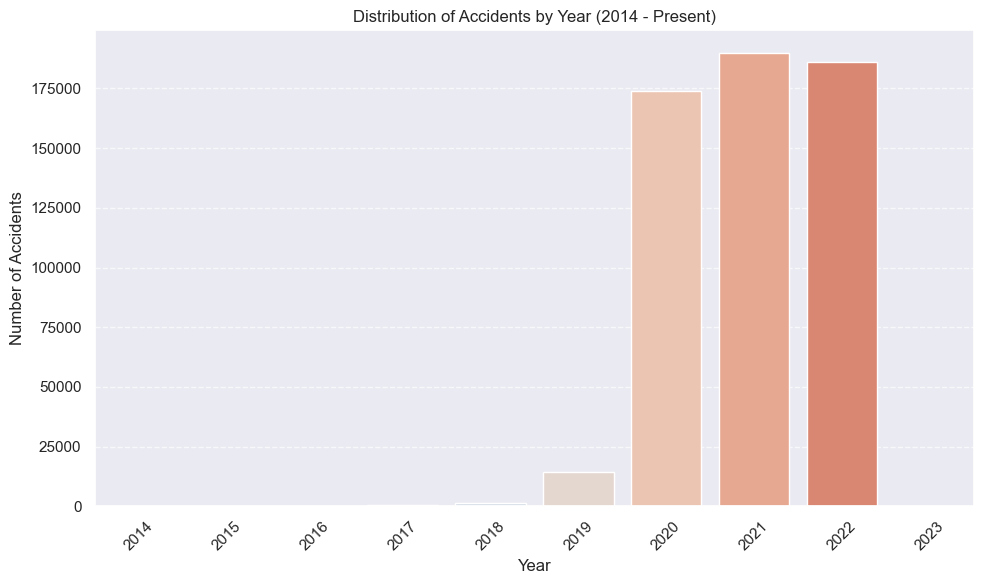

In [8]:
# Ensure 'Accident Date' is in datetime format without modifying df_train permanently
df_train_temp = df_train.copy()
df_train_temp['Accident Date'] = pd.to_datetime(df_train_temp['Accident Date'], errors='coerce')

# Count occurrences of 'Accident Year' from 2014 onward
accident_year_counts = df_train_temp[df_train_temp['Accident Date'].dt.year >= 2014]['Accident Date'].dt.year.value_counts().sort_index()

# Plot accident occurrences by year using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=accident_year_counts.index, y=accident_year_counts.values, palette='coolwarm')
plt.title("Distribution of Accidents by Year (2014 - Present)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* Distribution of Accidents by Year – Most of the accidents registered on our dataset occurred in 2020, 2021, 2022. Therefore, most of what our model is going to learn to make predictions will be from the data in 2020, 2021, 2022.
* Taking a closer look at Accident Occurrences, by Month for Each Year, there’s a noticeable drop in the number of accidents in between month three and five. If we consider major events during this period, this drop seems to be justified by the Covid-19 Pandemic, when most people were not allowed to leave their home, and therefore the work related accidents were less likely. 
* Analyzing the number of accidents by day of the week, we noticed that there are less occurrences during the weekend, as expected, taking into consideration that it is commonly the case not to work during the weekend.


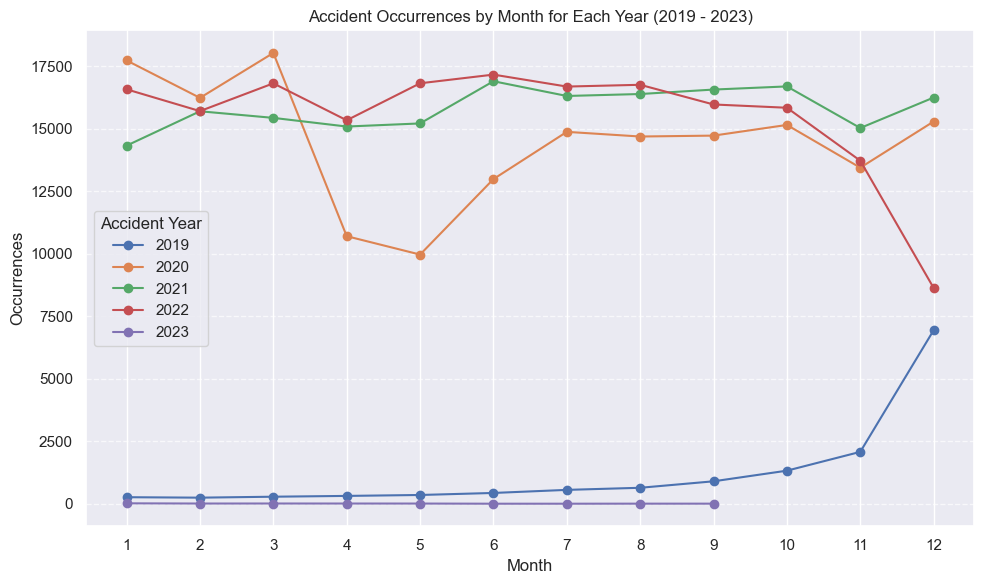

In [9]:
# Define the range of years we want to plot
target_years = range(2019, 2024)
# Prepare the figure
plt.figure(figsize=(10, 6))

# Loop over each year in the target range and plot monthly occurrences
for year in target_years:
    # Filter data for the specific year and count occurrences by month
    month_counts = df_train_temp[df_train_temp['Accident Date'].dt.year == year]['Accident Date'].dt.month.value_counts().sort_index()
    
    # Plot occurrences for each month in the year
    plt.plot(month_counts.index, month_counts.values, marker='o', label=f'{year}')

# Set titles and labels
plt.title('Accident Occurrences by Month for Each Year (2019 - 2023)')
plt.xlabel('Month')
plt.ylabel('Occurrences')
plt.xticks(range(1, 13))  # Display months from 1 to 12
plt.legend(title='Accident Year') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()



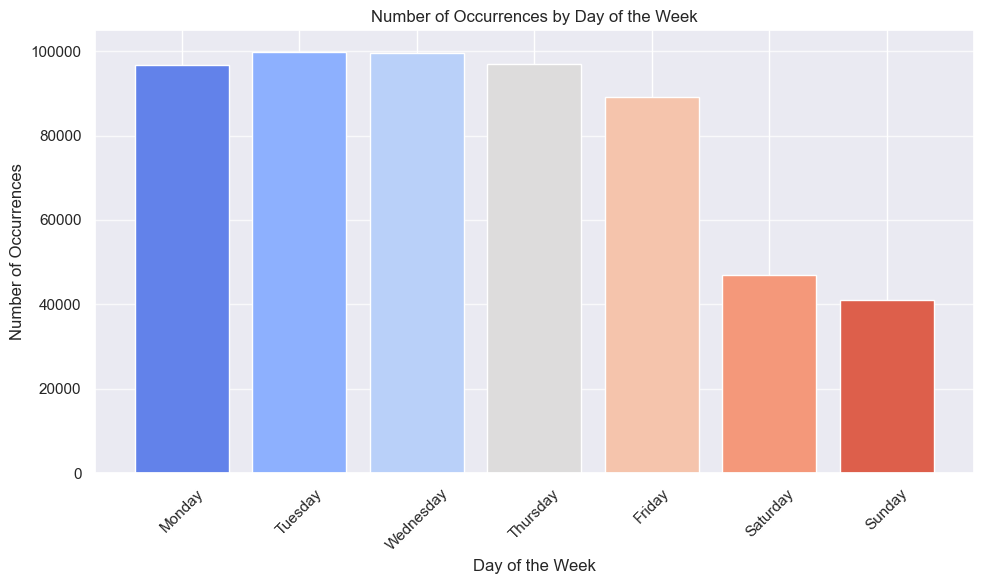

In [10]:
# Define the order of days for consistent ordering on the x-axis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count occurrences by day of the week directly from 'Accident Date' without modifying the original DataFrame
day_of_week_counts = df_train_temp['Accident Date'].dropna().dt.day_name().value_counts().reindex(day_order)

# Set up color palette
colors = sns.color_palette("coolwarm", len(day_order))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_counts.index, day_of_week_counts.values, color=colors)
plt.title('Number of Occurrences by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


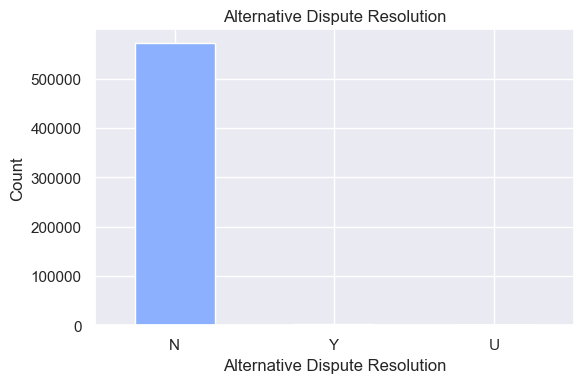

In [11]:
# Count occurrences of 'Alternative Dispute Resolution' without modifying the original DataFrame
attorney_counts = df_train_temp["Alternative Dispute Resolution"].value_counts()

# Use Seaborn's coolwarm palette for the bar colors
colors = sns.color_palette("coolwarm", len(attorney_counts))

# Plot the counts using the coolwarm color palette
plt.figure(figsize=(6, 4))
attorney_counts.plot(kind='bar', color=colors)
plt.title('Alternative Dispute Resolution')
plt.xlabel('Alternative Dispute Resolution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


* Regarding the execution of Alternative Dispute Resolutions, it did not occur for more than 95% of the dataset entries. Due to the high class imbalance of this feature, it will most likely not have a significant influence on the target variable, so the model will not learn much from it.


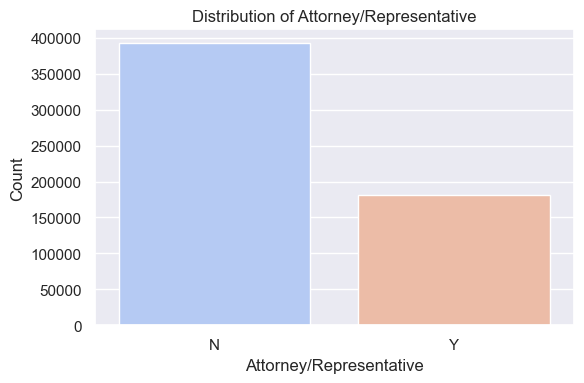

In [12]:
# Bar plot for 'Attorney/Representative'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train_temp, x='Attorney/Representative', order=df_train_temp['Attorney/Representative'].value_counts().index, palette=sns.color_palette("coolwarm", 2))
plt.title('Distribution of Attorney/Representative')
plt.xlabel('Attorney/Representative')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


The Distribution of the existence of an Attorney / Representative provides enough cases of each binary option for the model to be potentially able to learn useful knowledge to predict the target dependent variable.

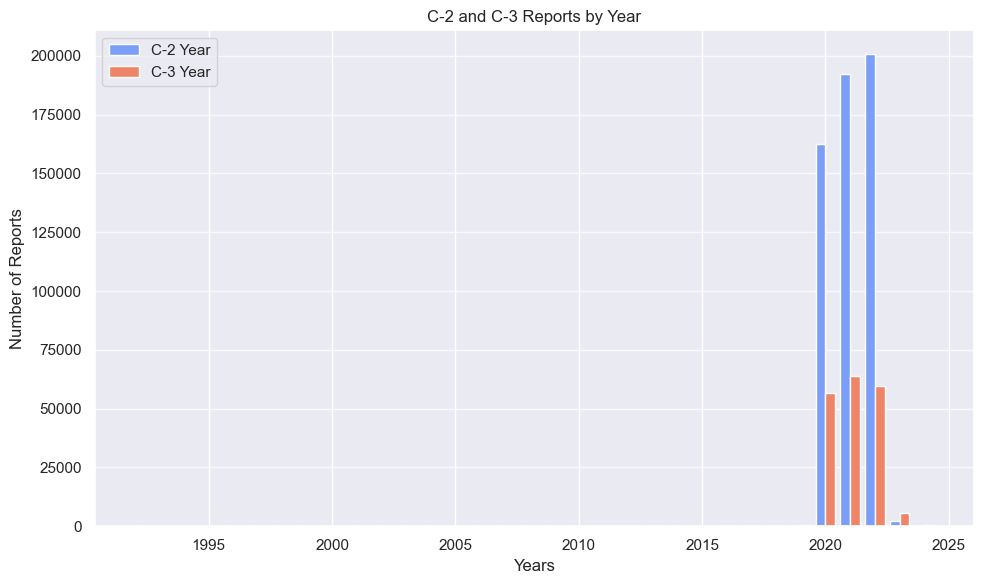

In [13]:
# Ensure 'C-2 Date' and 'C-3 Date' are in datetime format
df_train_temp['C-2 Date'] = pd.to_datetime(df_train_temp['C-2 Date'], errors='coerce')
df_train_temp['C-3 Date'] = pd.to_datetime(df_train_temp['C-3 Date'], errors='coerce')

# Count the occurrences of each year in 'C-2 Date' and 'C-3 Date'
C2_count = df_train_temp['C-2 Date'].dt.year.value_counts().sort_index()
C3_count = df_train_temp['C-3 Date'].dt.year.value_counts().sort_index()

# Set up the figure
plt.figure(figsize=(10, 6))

# Use a coolwarm color palette from Seaborn directly within the bar plot
plt.bar(C2_count.index - 0.2, C2_count.values, width=0.4, color=sns.color_palette("coolwarm", as_cmap=True)(0.2), label='C-2 Year')
plt.bar(C3_count.index + 0.2, C3_count.values, width=0.4, color=sns.color_palette("coolwarm", as_cmap=True)(0.8), label='C-3 Year')

# Titles and labels
plt.title("C-2 and C-3 Reports by Year")
plt.xlabel("Years")
plt.ylabel("Number of Reports")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout for better readability
plt.show()


* The visualization shows that C-2 reporting is more consistent and frequent than C-3 reporting from 2020 onwards, with many few reports before 2020. This trend reflects that there has been a significant increase in reporting activity in recent years. We decided to examine the C-2 and C-3 time intervals up to the year of the accident and found that the median was very low, with a clustering of values around 0 to 10 days, suggesting that reports are being filled in very close to the time of the accident. This information will later help us to fill in missing values at the accident date due to their high relatedness.

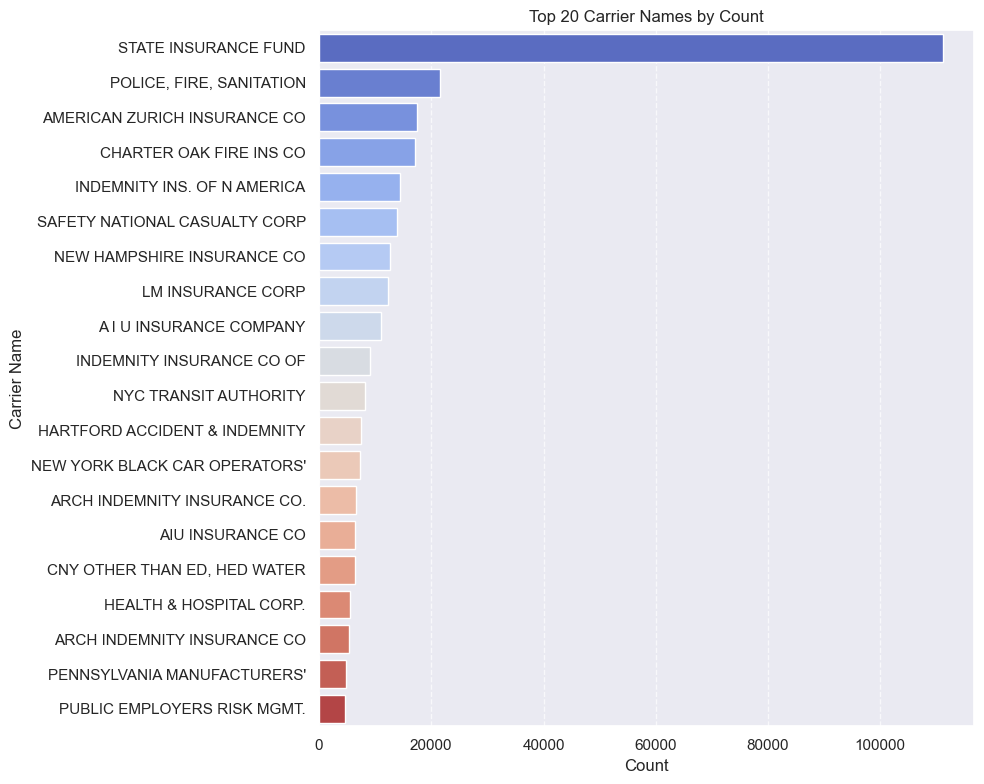

In [14]:
# Get the top 20 value counts for 'Carrier Name' in descending order
carrier_counts = df_train['Carrier Name'].value_counts().nlargest(20)

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot the top 20 value counts as a horizontal bar plot using a color palette
sns.barplot(y=carrier_counts.index, x=carrier_counts.values, palette="coolwarm")

# Titles and labels
plt.title("Top 20 Carrier Names by Count")
plt.xlabel("Count")
plt.ylabel("Carrier Name")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout for better readability
plt.show()


The distribution of “Carrier Name” is highly skewed, with a few carriers, notably “State Insurance Fund” and “Police, Fire, Sanitation,” accounting for the majority of occurrences. Many other carriers appear with much lower frequencies, which highlights a great deal of cardinality in this feature.

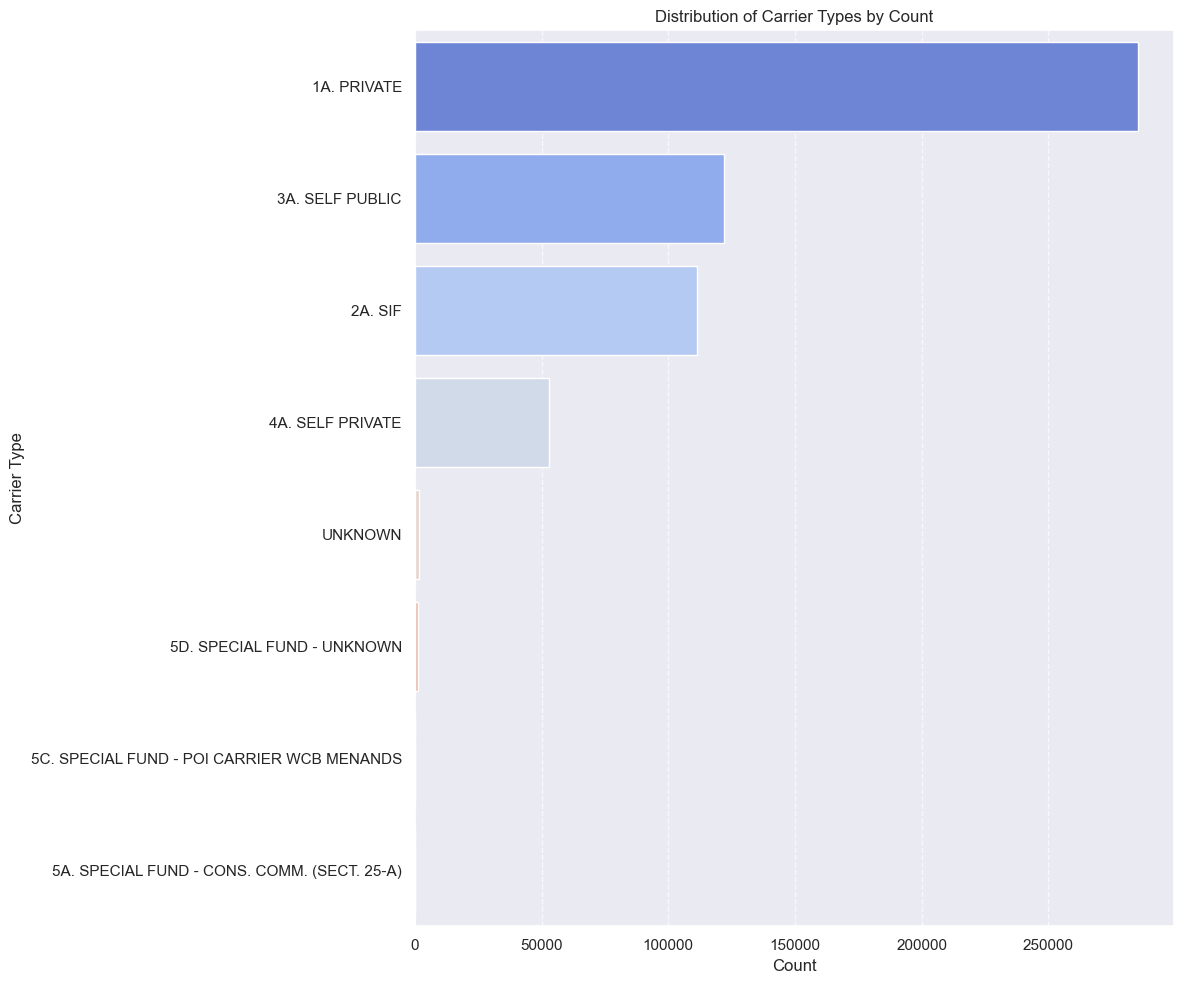

In [15]:
# Get the value counts for 'Carrier Type' in descending order
carrier_type_counts = df_train['Carrier Type'].value_counts()

# Set up the plot
plt.figure(figsize=(12, 10))

# Plot the value counts as a horizontal bar plot using the coolwarm color palette
sns.barplot(y=carrier_type_counts.index, x=carrier_type_counts.values, palette="coolwarm")

# Titles and labels
plt.title("Distribution of Carrier Types by Count")
plt.xlabel("Count")
plt.ylabel("Carrier Type")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout for better readability
plt.show()


Similarly, in the Distribution Of Carrier Types by Count, there is an extremely low frequency of cases in some categories of this feature. More insights can be drawn from the top four most selected options of this variable, such as Private Career types and Self Public, being, as expected, some of the most common.

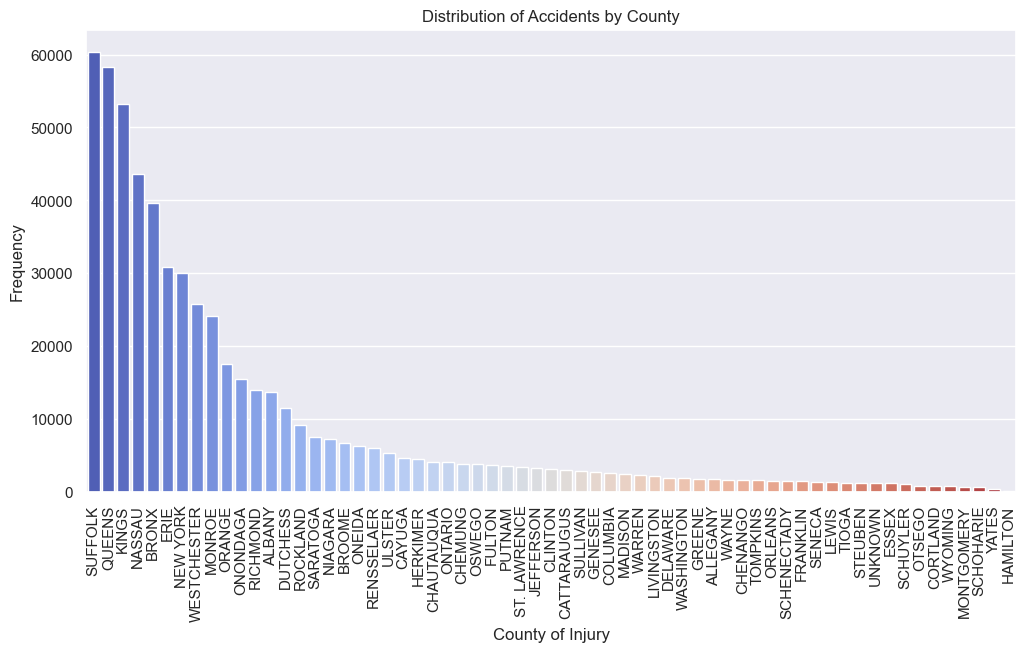

In [16]:
# Bar plot for 'County of Injury' with adjusted colors
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='County of Injury', order=df_train['County of Injury'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distribution of Accidents by County')
plt.ylabel('Frequency')
plt.show()

In this long tail distribution, a high cardinality situation is once again visible, where there is a significant difference in the number of accidents, comparing some counties.

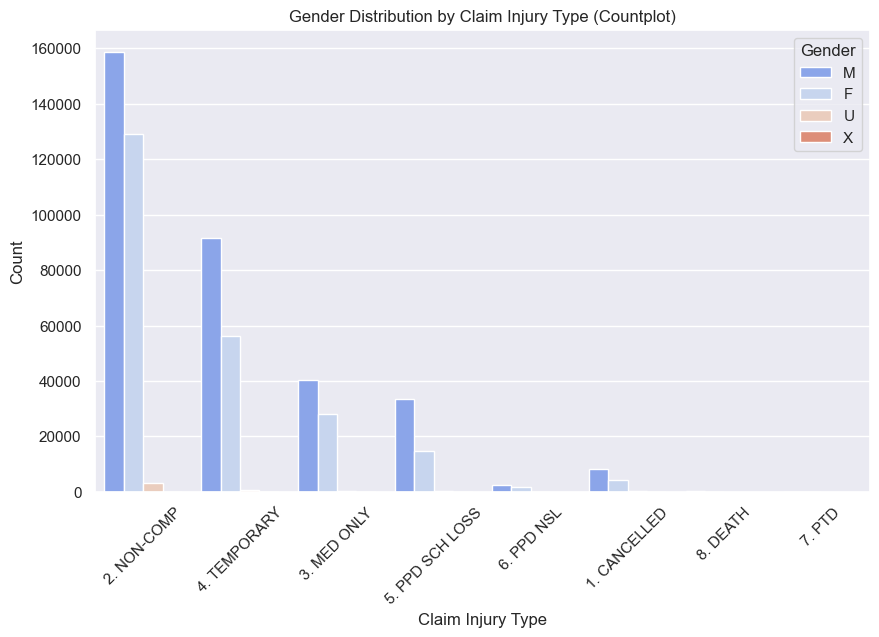

In [17]:
# Set the figure size to make the plot more readable
plt.figure(figsize=(10, 6))

# Create a count plot to display the distribution of Claim Injury Types by Gender
# 'x' specifies the Claim Injury Type, and 'hue' adds a color distinction based on Gender
# 'data' specifies the DataFrame source, and 'palette' sets the color scheme
sns.countplot(x='Claim Injury Type', hue='Gender', data=df_train, palette='coolwarm')

# Set the title of the plot for context
plt.title('Gender Distribution by Claim Injury Type (Countplot)')

# Label the x-axis to indicate the categories of injury claims
plt.xlabel('Claim Injury Type')

# Label the y-axis to indicate the count of occurrences
plt.ylabel('Count')

# Rotate x-axis labels to improve readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Cross analyzing the gender feature with the target variable, there is not an obvious difference in proportions between genders comparing each Claim Injury Type. However, for example, comparing the Claim Injury Type 3. To the Claim Injury Type 5.,  the proportion of Male and Female in 3. Is relatively close, whereas in 5. There is more than double of male, than female.

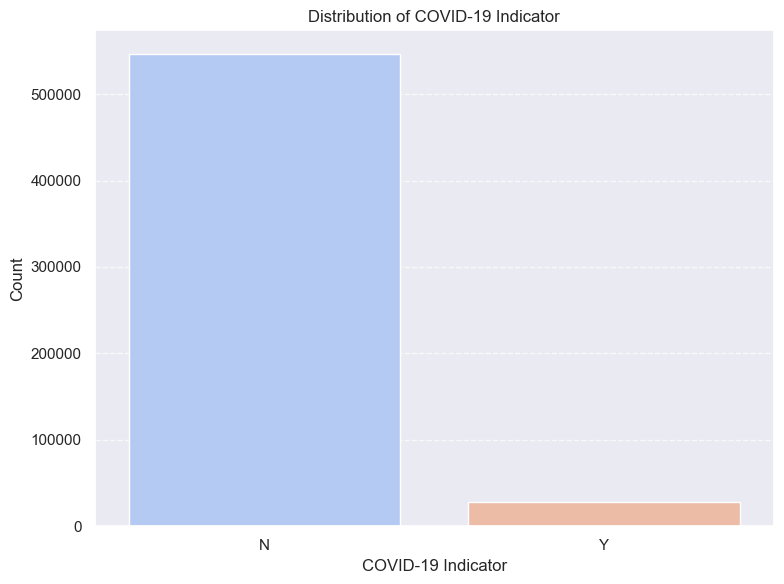

In [18]:
# Get the value counts for 'COVID-19 Indicator'
covid_indicator_counts = df_train['COVID-19 Indicator'].value_counts()

# Set up the plot
plt.figure(figsize=(8, 6))

# Plot the value counts as a bar plot using the coolwarm color palette
sns.barplot(x=covid_indicator_counts.index, y=covid_indicator_counts.values, palette="coolwarm")

# Titles and labels
plt.title("Distribution of COVID-19 Indicator")
plt.xlabel("COVID-19 Indicator")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout for better readability
plt.show()


Large majority of the dataset entries do not register positive for COVID-19, counting for more than 90%, Due to the high class imbalance of this feature, it will most likely not have a significant influence on the target variable, so the model will not learn much from it.

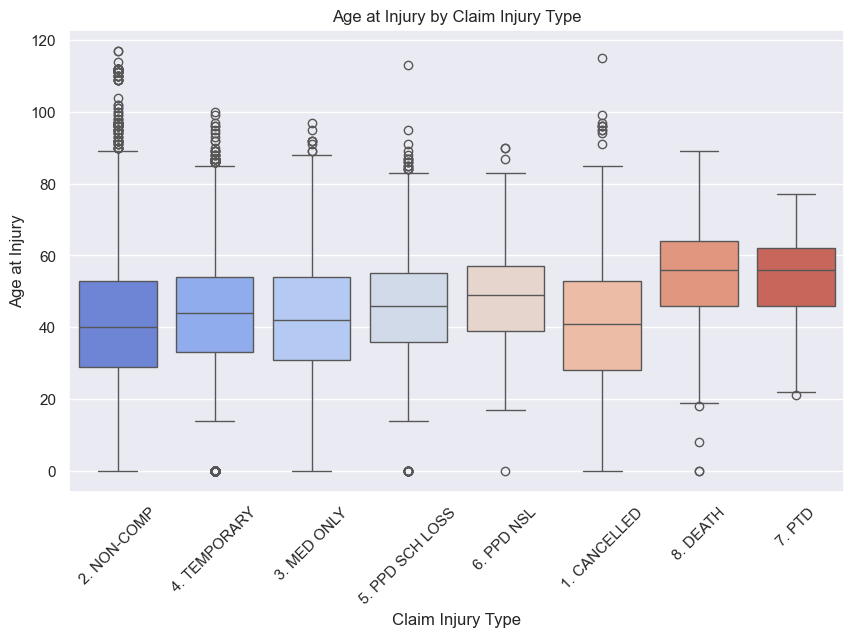

In [19]:
# Boxplot for 'Age at Injury' by 'Claim Injury Type'
plt.figure(figsize=(10, 6))

# Apply a color palette and rotate the labels
sns.boxplot(data=df_train, x='Claim Injury Type', y='Age at Injury', palette='coolwarm')

# Set title and labels in English
plt.title('Age at Injury by Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Age at Injury')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


This box plot shows the distribution of “age at time of injury” among the different “claim types”, which reveals some consistent patterns. For example, the majority of the injury types show a median age around 40-50 years, indicating that injuries affect a similar age range across the different claim types. More severe injuries, like “DEATH” and “PTD” (Permanent Total Disability), tend to affect older people, with a higher average age. The “TEMPORARY” and “PPD NSL” (Permanent Partial Disability with Unscheduled Loss) age categories present broader age ranges. In general, although injuries affect people of different ages, the most severe types of claims are associated with older age groups.

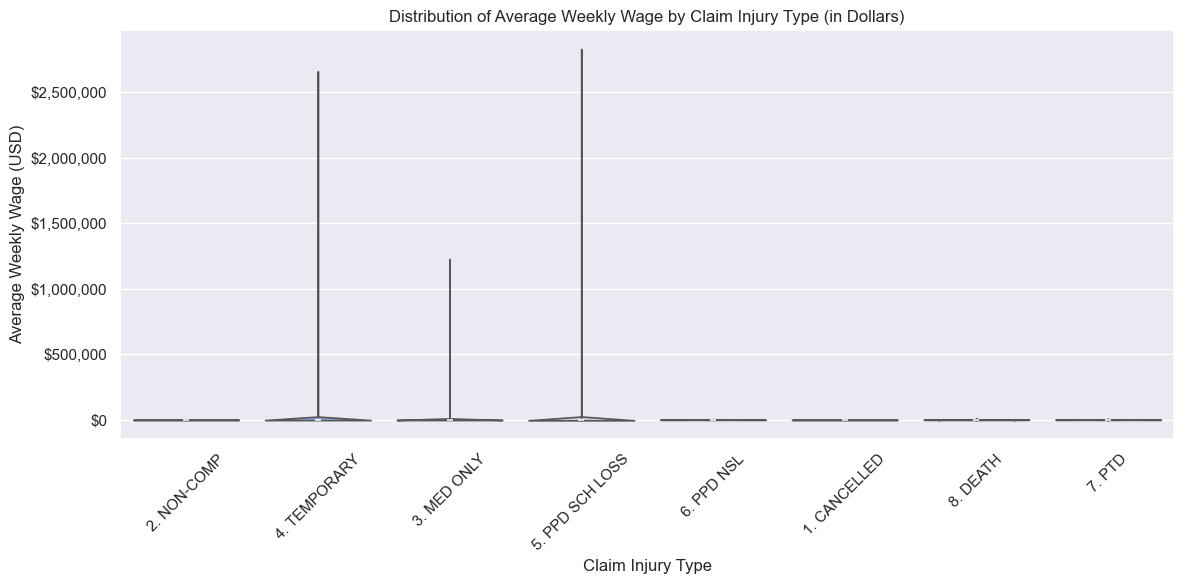

In [20]:
# Set up a larger figure size for better readability
plt.figure(figsize=(12, 6))

# Create a violin plot to show the distribution of 'Average Weekly Wage' for each 'Claim Injury Type'
# This time, no filtering is applied, so all data, including outliers, is shown
sns.violinplot(data=df_train, x='Claim Injury Type', y='Average Weekly Wage', palette="coolwarm")

# Add a title and axis labels for context and readability
plt.title('Distribution of Average Weekly Wage by Claim Injury Type (in Dollars)')
plt.xlabel('Claim Injury Type')
plt.ylabel('Average Weekly Wage (USD)')

# Format the y-axis to display values in dollars with thousand separators
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Rotate x-axis labels for better readability, especially for longer claim types
plt.xticks(rotation=45)

# Adjust layout to prevent overlap and improve spacing
plt.tight_layout()

# Display the plot
plt.show()


​​The violin graph illustrates the distribution of average weekly salary among the different claim types. The “Temporary” and “Med Only” claim type show notably higher average wages, combined with a broader array of wage values, as we can see in the taller lines in the graph. We observed, therefore  that these claim types affect people with a broader income spectrum. In contrast, other types of claims, such as “ Non-compensatpry” and “Voided,” have lower average wages and narrower distributions, indicating a narrower wage range. In general, “Temporary” and “Med Only” claims do seem to involve higher and more variable weekly wages compared to other injury types.

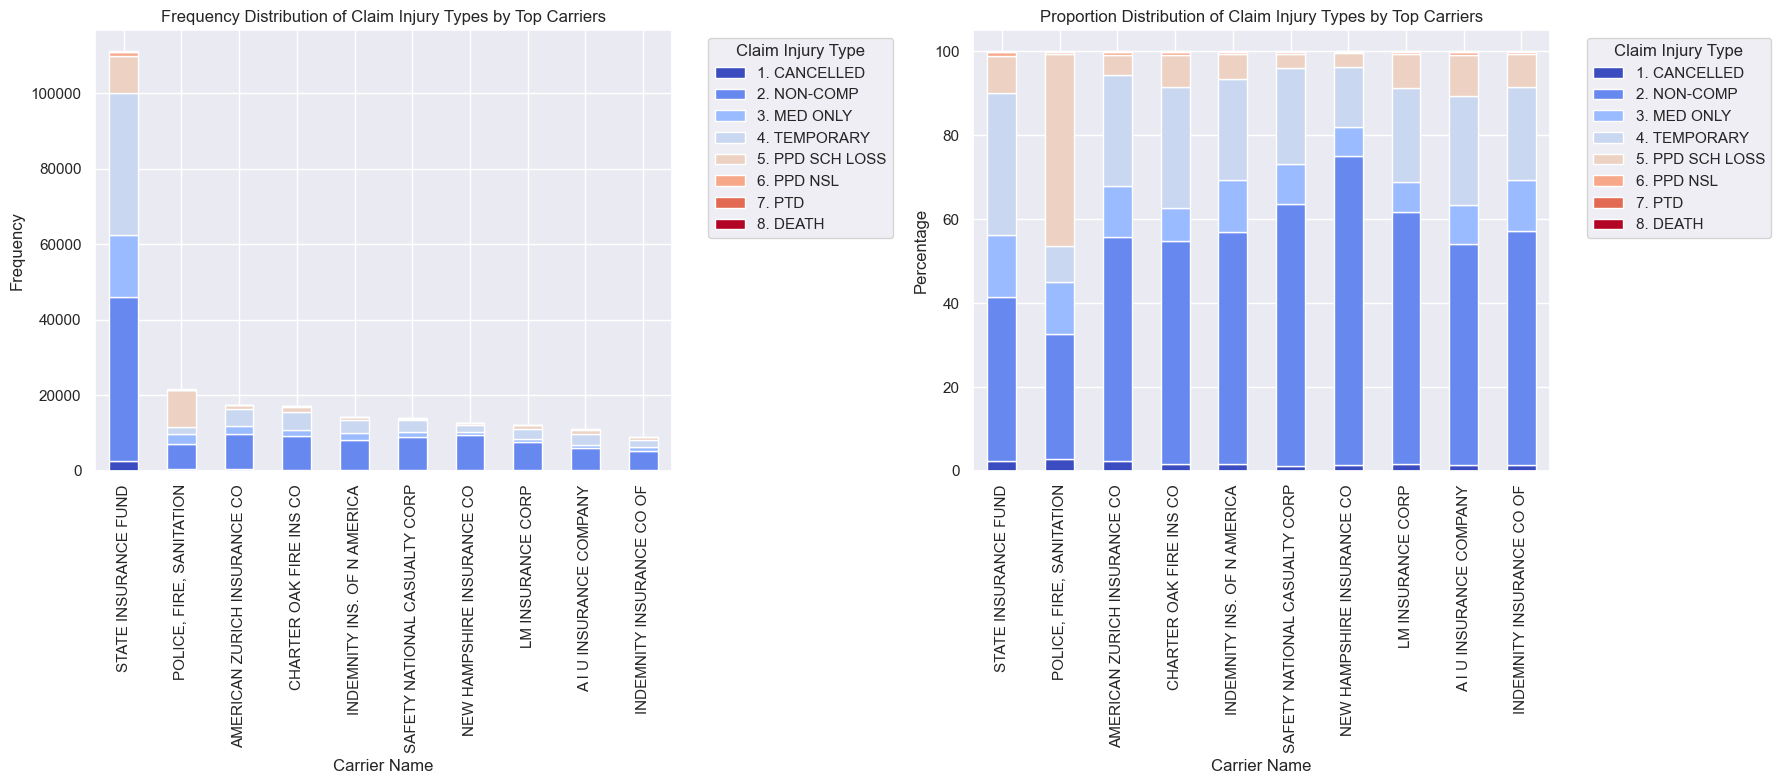

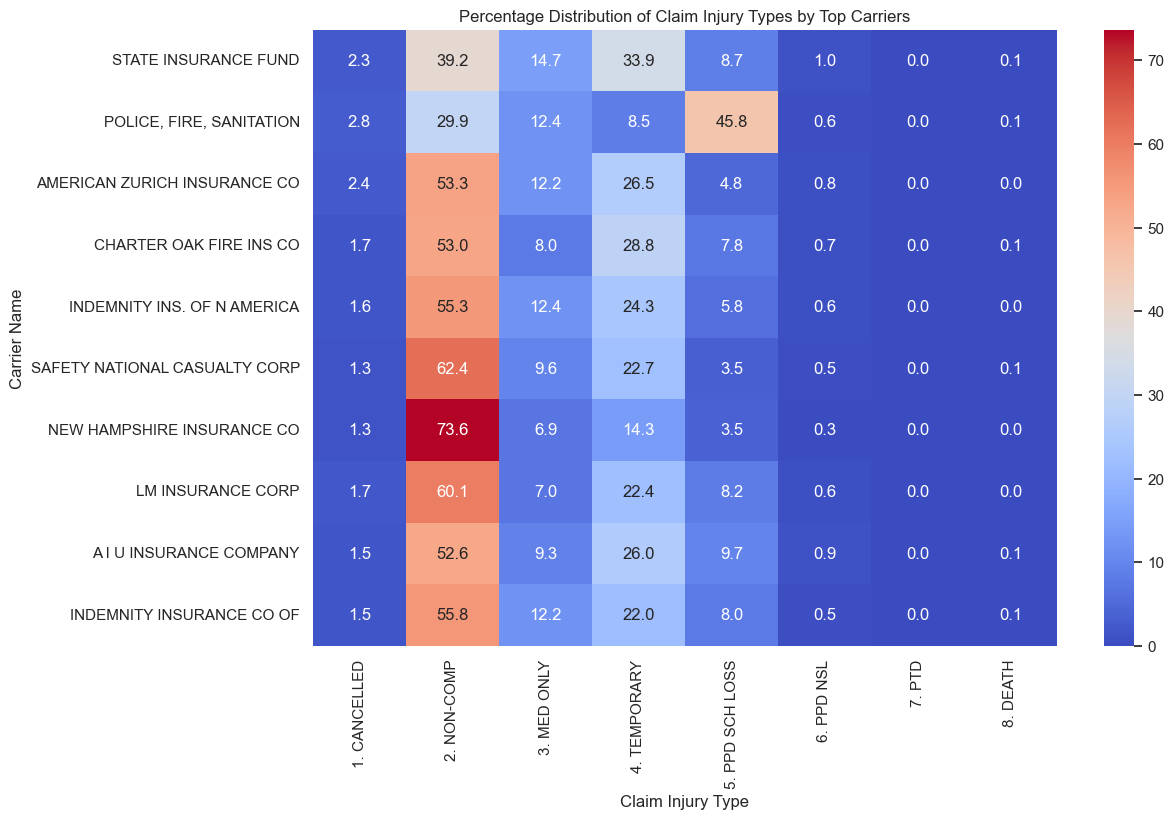

In [21]:
# Create a crosstab for 'Carrier Name' and 'Claim Injury Type' in df_train
carrier_claim_type_counts = pd.crosstab(df_train['Carrier Name'], df_train['Claim Injury Type'])

# Determine the top 10 carriers by frequency of claims
top_carriers = carrier_claim_type_counts.sum(axis=1).nlargest(10).index

# Filter the data to include only the top carriers
top_carrier_claim_type_counts = carrier_claim_type_counts.loc[top_carriers]

# Calculate the percentage distribution of claim types within each carrier
top_carrier_claim_type_percentage = top_carrier_claim_type_counts.div(top_carrier_claim_type_counts.sum(axis=1), axis=0) * 100

# Create subplots for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Stacked bar plot showing the absolute frequency distribution of Claim Injury Type
top_carrier_claim_type_counts.plot(kind='bar', stacked=True, colormap="coolwarm", ax=axes[0])
axes[0].set_title("Frequency Distribution of Claim Injury Types by Top Carriers")
axes[0].set_xlabel("Carrier Name")
axes[0].set_ylabel("Frequency")
axes[0].legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Stacked bar plot showing the normalized (proportion) distribution
top_carrier_claim_type_percentage.plot(kind='bar', stacked=True, colormap="coolwarm", ax=axes[1])
axes[1].set_title("Proportion Distribution of Claim Injury Types by Top Carriers")
axes[1].set_xlabel("Carrier Name")
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Heatmap for top carriers with coolwarm color palette
plt.figure(figsize=(12, 8))
sns.heatmap(top_carrier_claim_type_percentage, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Percentage Distribution of Claim Injury Types by Top Carriers")
plt.xlabel("Claim Injury Type")
plt.ylabel("Carrier Name")
plt.show()

The graphs reveal that State Insurance Fund handles the largest volume of claims, with a particular focus on Non-Comp and Temporary injury types. Companies such as New Hampshire Insurance Co. and Safety National Casualty Corp. have a high proportion of Non-Comp claims, making up over 60% and 70% of their respective claims. In contrast, “Police, Fire, Sanitation” has a more varied distribution of claims, but the 45% in “PPD NSL” stands out. These patterns suggest that particular carriers may focus on specific types of injury claims, likely influenced by the nature of their policyholders and the types of coverage they offer. This will be valuable to understand for model building going forward.

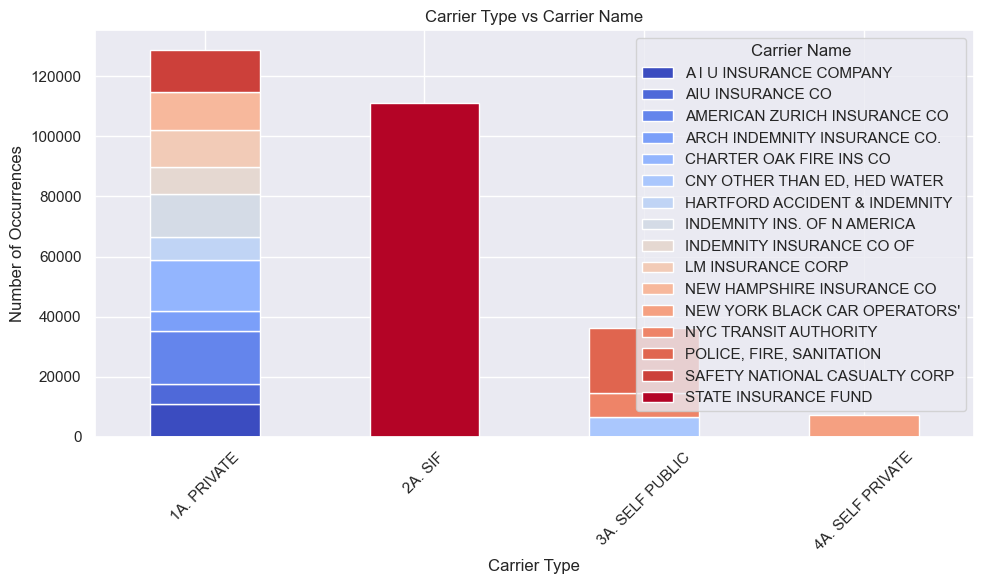

In [22]:
# Calculate percentage of each 'Carrier Name' in df_train
carrier_name_percentage = df_train["Carrier Name"].value_counts(normalize=True) * 100

# Filter for carrier names that are higher than 1%
filtered_carrier_names = carrier_name_percentage[carrier_name_percentage > 1].index
filtered_data = df_train[df_train["Carrier Name"].isin(filtered_carrier_names)]

# Create a crosstab of 'Carrier Type' and 'Carrier Name'
carrier_crosstab = pd.crosstab(filtered_data['Carrier Type'], filtered_data['Carrier Name'])

# Plot the crosstab with coolwarm color palette
plt.figure(figsize=(10, 6))
carrier_crosstab.plot(kind='bar', stacked=True, colormap="coolwarm", ax=plt.gca())  
plt.title('Carrier Type vs Carrier Name')
plt.xlabel('Carrier Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

The bar chart illustrates the distribution of the types of insurance companies among the various carriers. The “2A SIF” (State Insurance Fund) company has the highest number of appearances, well above others. The “1A Private” companies also appear frequently, with contributions from multiple companies, such as “American Zurich Insurance Co” and “Charter Oak Fire Ins Co”. The categories “3A Public Self-Employed” and “4A Private Self-Employed” are much less frequent, with minimal representation from a few companies. These data reflect the importance of state and private insurers in the data set, with public and private insurers contributing a smaller share of claims.

**1.6 Analysing multivariate relationships**

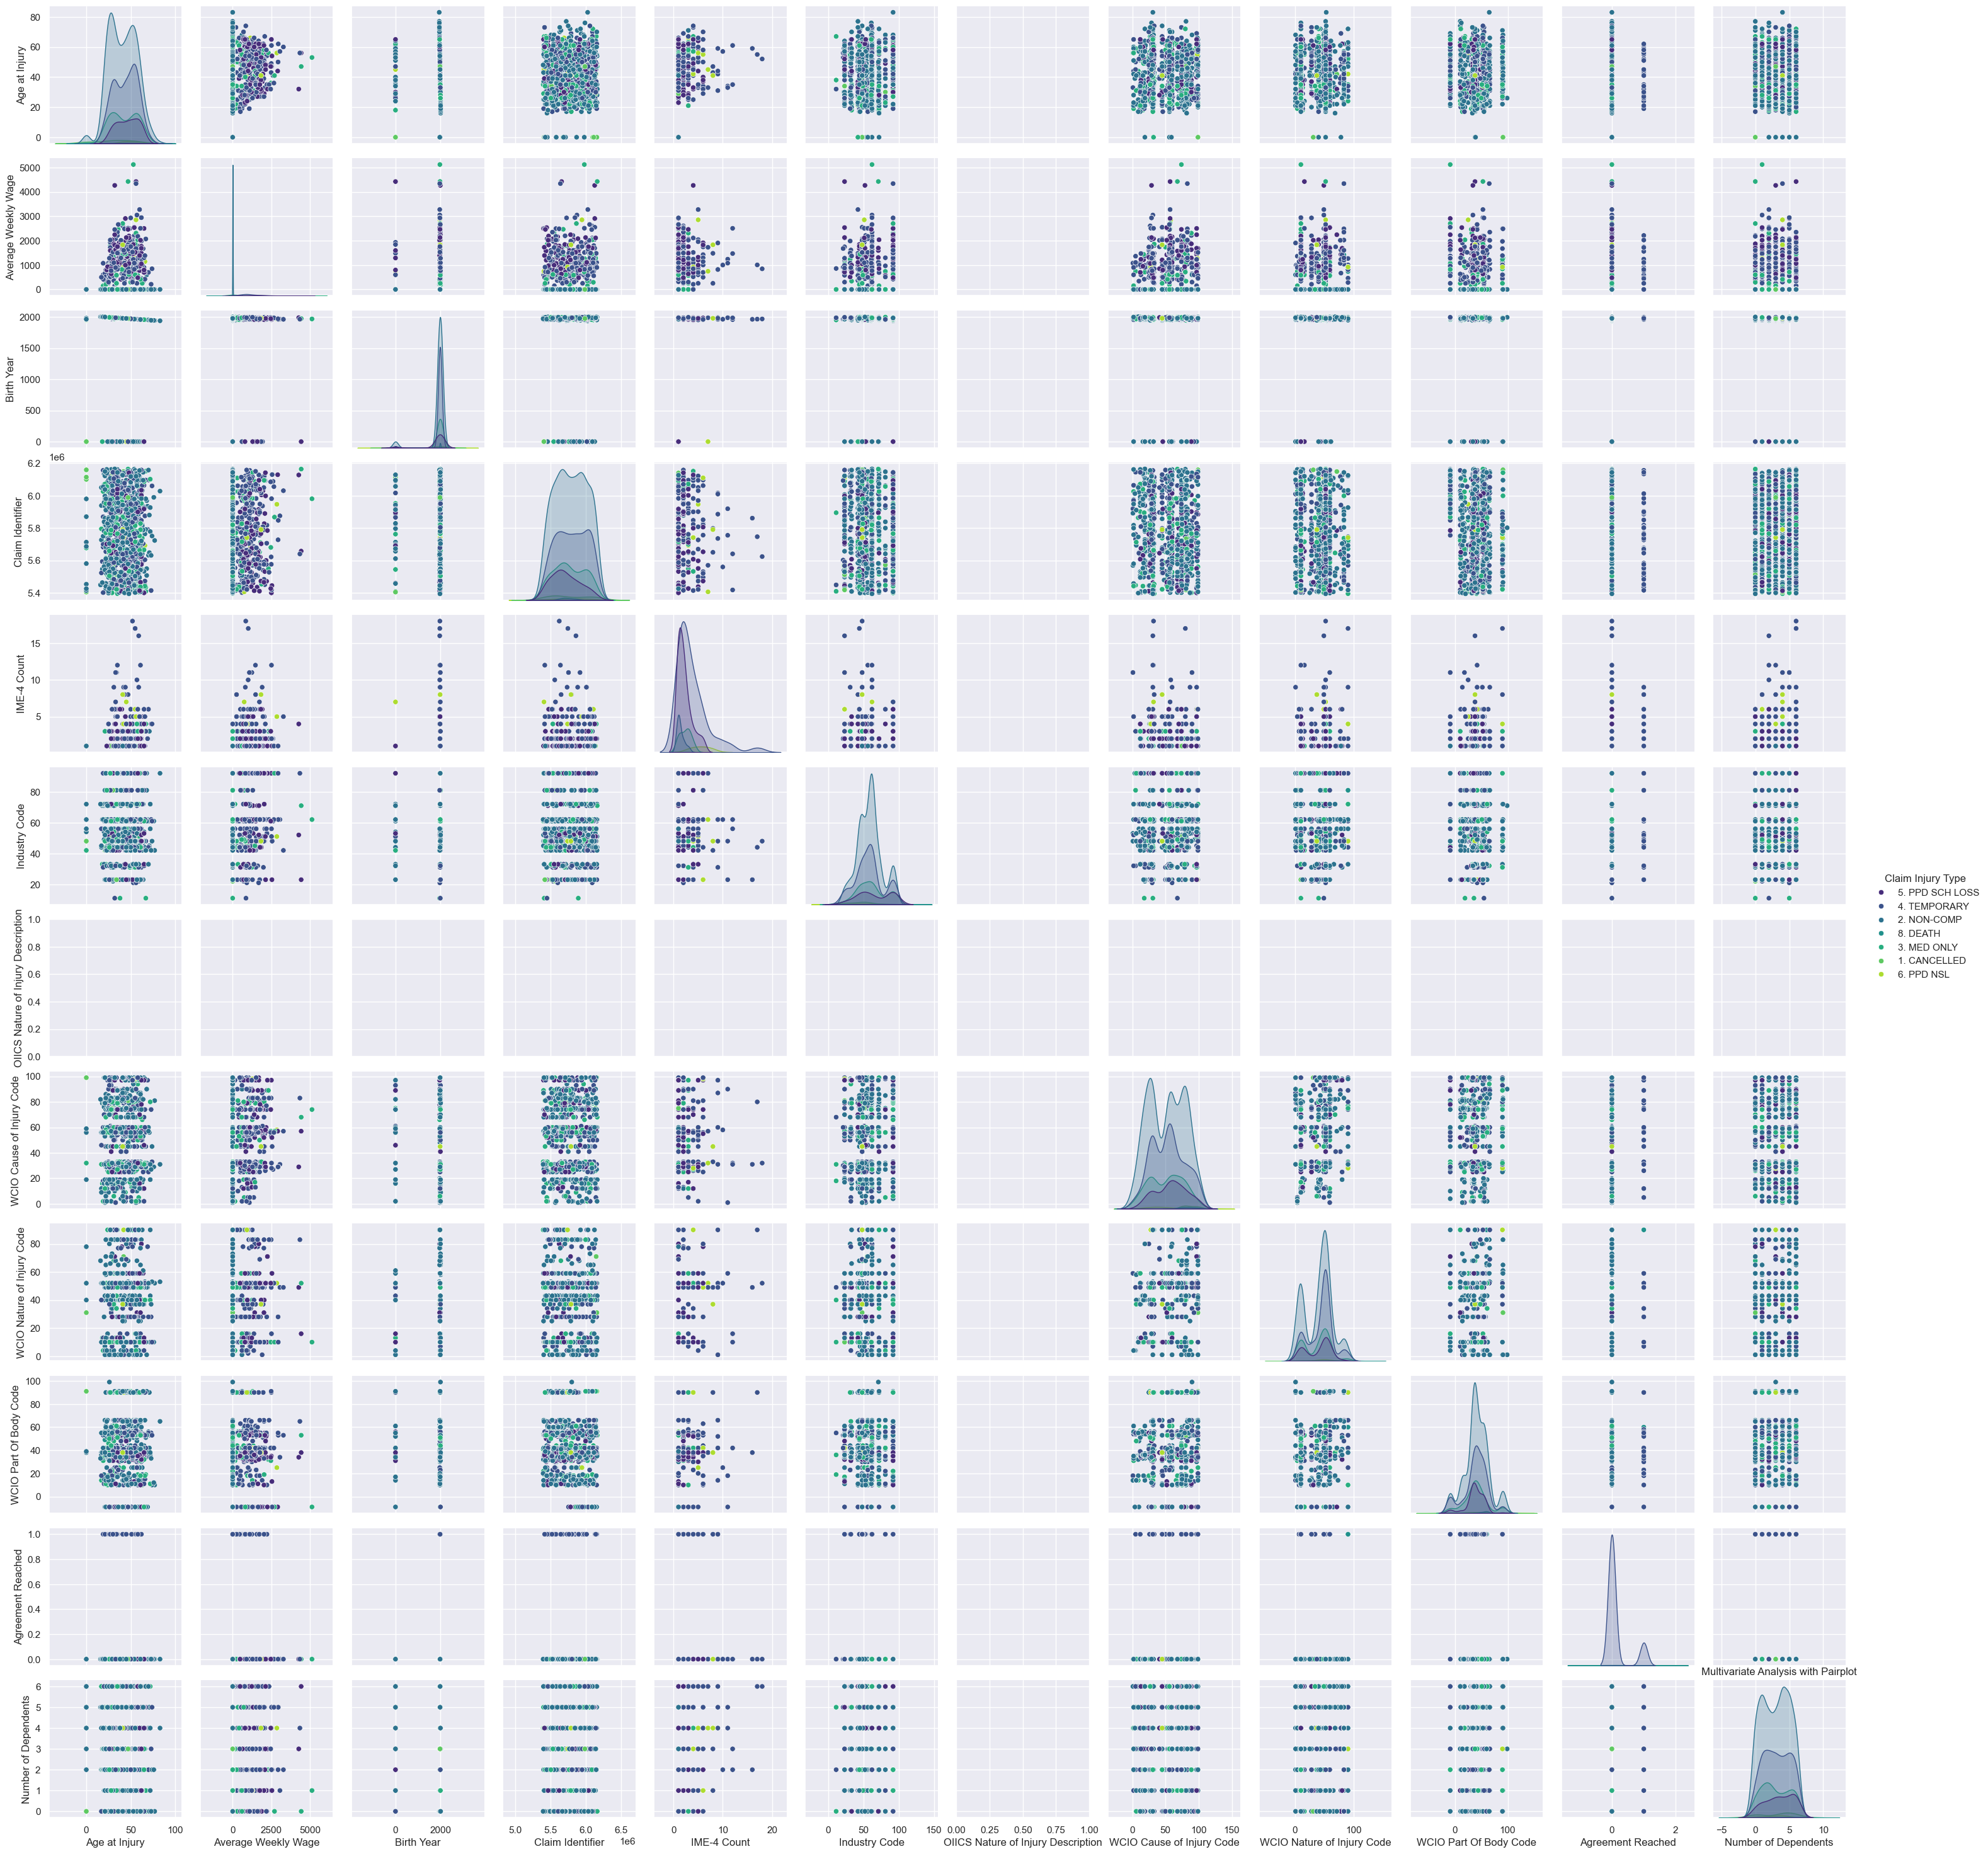

In [23]:
# Sampling 1000 random rows from DataFrame
df_sample = df_train.sample(1000, random_state=42)

# Create pairplot with 'viridis' palette for enhanced visual distinction
sns.pairplot(df_sample, hue="Claim Injury Type", palette="viridis")
plt.title('Multivariate Analysis with Pairplot')
plt.show()


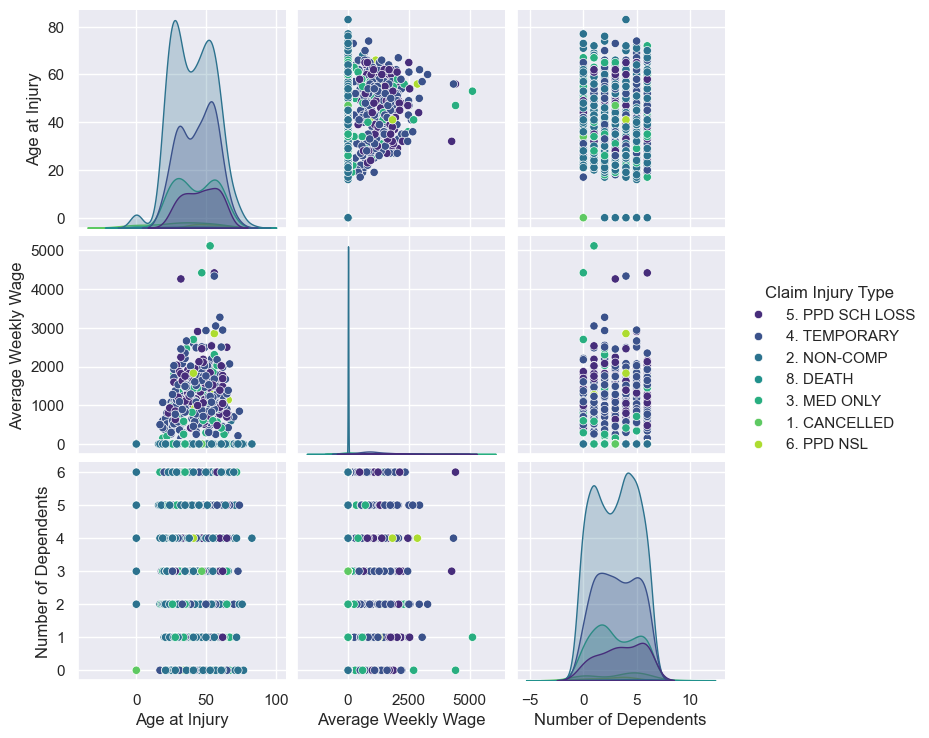

In [24]:
# Selecting only the most relevant variables
selected_columns = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents', 'Claim Injury Type']

# Create pairplot with 'viridis' palette for enhanced visual distinction
sns.pairplot(df_sample[selected_columns], hue="Claim Injury Type", palette="viridis")
plt.show()


## *1.6.1 Correlation Between Numerical Variables*

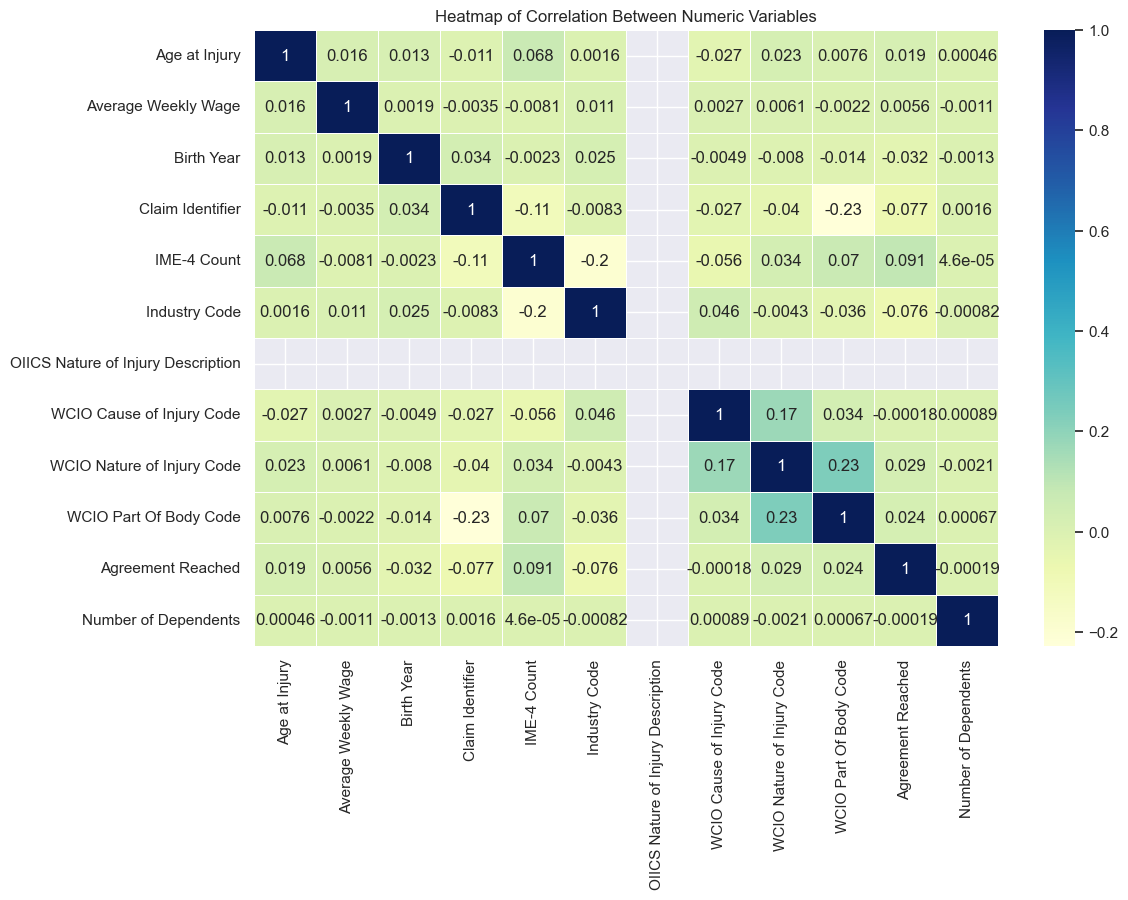

In [25]:
# Filter only the numeric variables
df_numeric = df_train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap with the 'YlGnBu' color palette for a different color scheme
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Correlation Between Numeric Variables')
plt.show()

## *1.6.2 Correlation Between Categorical Variables*

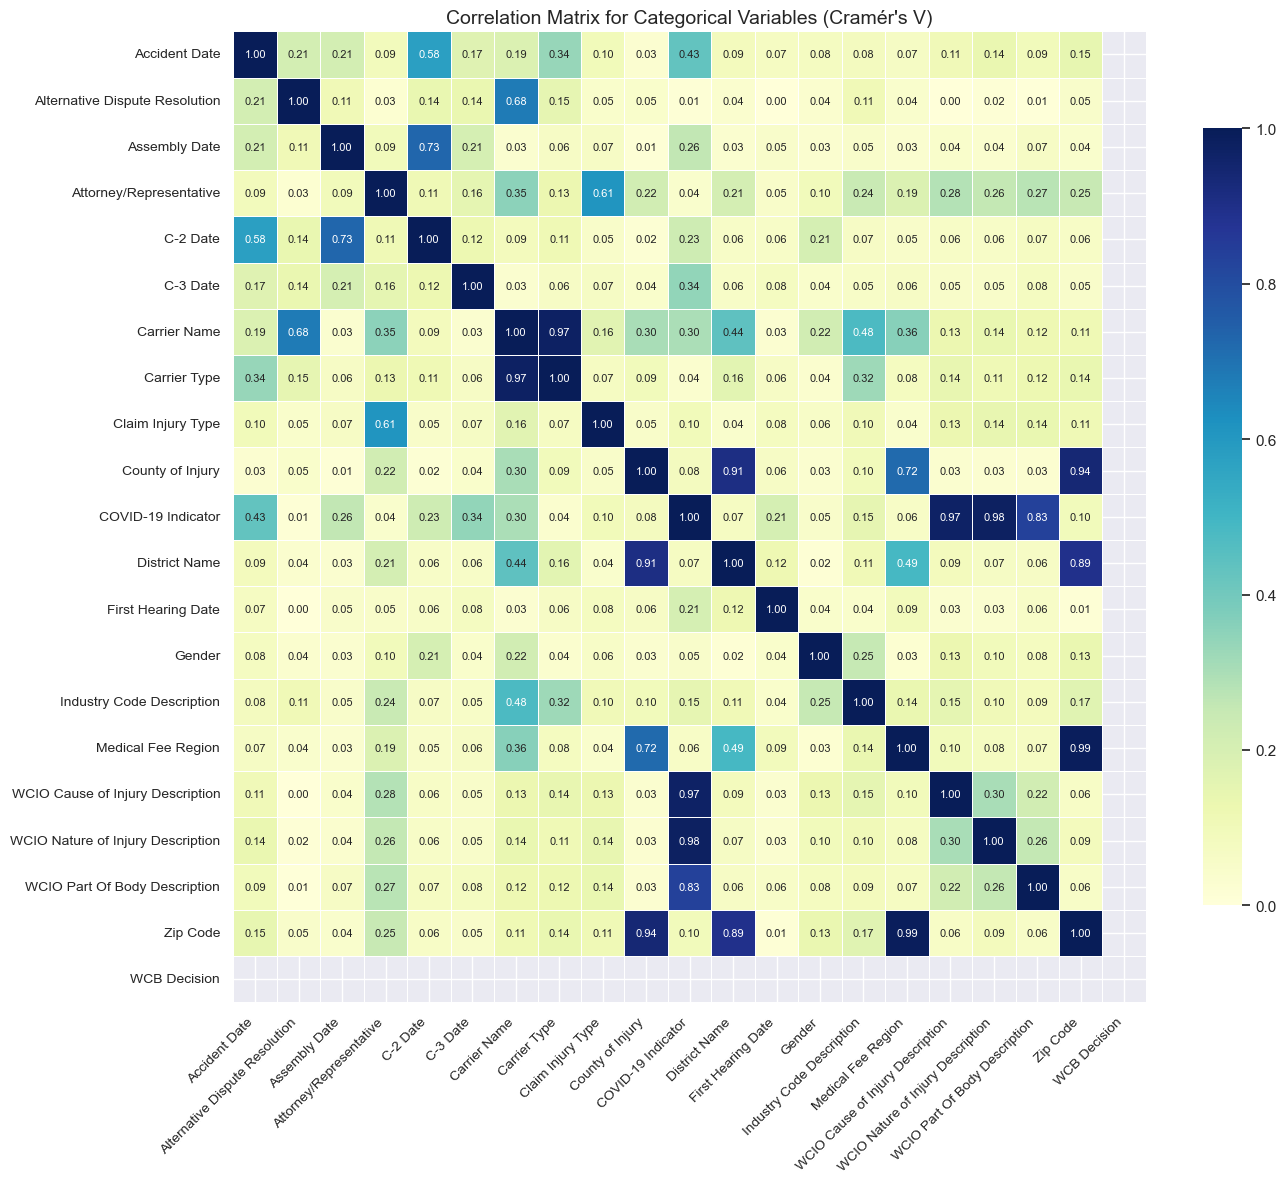

In [26]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select only the categorical columns which are all the ones that are not float or int
cat_cols = df_train.select_dtypes(exclude=['float64', 'int64']).columns

# Create a DataFrame with the categorical columns
X_train_cat = df_train[cat_cols]

# Create an empty DataFrame to store the Cramér's V values
cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Calculate Cramér's V for each pair of categorical variables
for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(X_train_cat[col1], X_train_cat[col2])

# Convert the values to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the correlation matrix with improved readability
plt.figure(figsize=(14, 12))  # Increase figure size for better visibility
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="YlGnBu",  # Use a contrasting color palette
            linecolor='white', linewidths=0.5, cbar_kws={'shrink': .8},
            annot_kws={"size": 8})  # Adjust font size within cells

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Title and display
plt.title("Correlation Matrix for Categorical Variables (Cramér's V)", fontsize=14)
plt.tight_layout()
plt.show()